In [1]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

from sklearn.model_selection import train_test_split

2023-03-25 13:49:17.786540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4


def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    # get local dir
    images_dir = os.path.sep.join([os.getcwd(), data_dir])

    images = []
    labels = []

    # loop through images
    for path, subdirs, files in os.walk(images_dir):
        # preprocess each image
        for filename in files:
            file_path = os.path.sep.join([path, filename])
            # print(file_path)
            # read image with cv2
            img = cv2.imread(file_path)
            #print(os.path.basename(os.path.dirname(file_path)))
            
            if img is not None:
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), cv2.INTER_AREA)
                # add image to list
                images.append(img)
                # add label to list
                labels.append(int(os.path.basename(os.path.dirname(file_path))))
            else:
                raise FileNotFoundError('File not found.')

        # for each image in each subdir in data_dir, read, convert and add to a list
    
    return images, labels

def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    model = tf.keras.models.Sequential([

         # Input Layer + 1st Convolution Layer
        tf.keras.layers.Conv2D(
            filters=64, kernel_size=(3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),

        # Max-pooling layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Convolution Layer
        tf.keras.layers.Conv2D(
            filters=64, kernel_size=(3, 3), activation='relu'
        ),

        # Max-pooling layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

         # Flatten units
        tf.keras.layers.Flatten(),

        # Dense Layer with dropout
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),


        # Output layer
        tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')

    ])

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return model

In [3]:
# Get image arrays and labels for all image files
images, labels = load_data("gtsrb")

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
history = model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)



    

Epoch 1/10


2023-03-25 13:49:20.342862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 13:49:20.343639: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


500/500 [==============================] - 23s 44ms/step - loss: 2.2855 - accuracy: 0.5061
Epoch 2/10
500/500 [==============================] - 22s 44ms/step - loss: 0.7146 - accuracy: 0.8071
Epoch 3/10
500/500 [==============================] - 23s 47ms/step - loss: 0.4350 - accuracy: 0.8815
Epoch 4/10
500/500 [==============================] - 22s 44ms/step - loss: 0.3603 - accuracy: 0.9041
Epoch 5/10
500/500 [==============================] - 21s 42ms/step - loss: 0.3082 - accuracy: 0.9160
Epoch 6/10
500/500 [==============================] - 21s 42ms/step - loss: 0.2468 - accuracy: 0.9319
Epoch 7/10
500/500 [==============================] - 23s 46ms/step - loss: 0.2149 - accuracy: 0.9425
Epoch 8/10
500/500 [==============================] - 23s 45ms/step - loss: 0.2389 - accuracy: 0.9352
Epoch 9/10
500/500 [==============================] - 21s 42ms/step - loss: 0.1972 - accuracy: 0.9479
Epoch 10/10
500/500 [==============================] - 21s 43ms/step - loss: 0.1428 - accurac

[0.2446030229330063, 0.954954981803894]

### Not Standardized

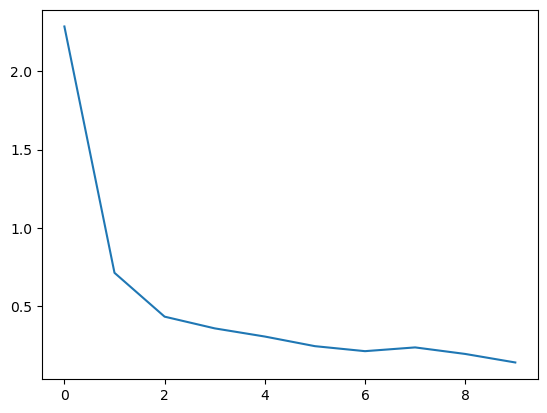

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

### Standardised

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [6]:
# Get image arrays and labels for all image files
images, labels = load_data("gtsrb")

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images)/255.0, np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
history = model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 1.6222 - accuracy: 0.5541
Epoch 2/10
500/500 [==============================] - 24s 47ms/step - loss: 0.3213 - accuracy: 0.9055
Epoch 3/10
500/500 [==============================] - 22s 44ms/step - loss: 0.1627 - accuracy: 0.9544
Epoch 4/10
500/500 [==============================] - 23s 47ms/step - loss: 0.1037 - accuracy: 0.9691
Epoch 5/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0697 - accuracy: 0.9794
Epoch 6/10
500/500 [==============================] - 23s 45ms/step - loss: 0.0632 - accuracy: 0.9817
Epoch 7/10
500/500 [==============================] - 21s 43ms/step - loss: 0.0410 - accuracy: 0.9875
Epoch 8/10
500/500 [==============================] - 22s 45ms/step - loss: 0.0432 - accuracy: 0.9879
Epoch 9/10
500/500 [==============================] - 22s 44ms/step - loss: 0.0349 - accuracy: 0.9879
Epoch 10/10
500/500 [==============================] - 22s 44ms/step - loss: 0.031

[0.06414110213518143, 0.9854542016983032]

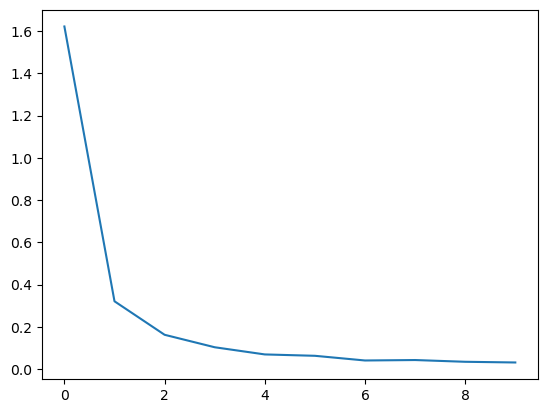

In [7]:
plt.plot(history.history['loss'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              